In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import scipy
from PIL import Image
from scipy import ndimage

In [2]:
from lr_utils import load_dataset

In [496]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = 0, it's a 'non-cat' picture.


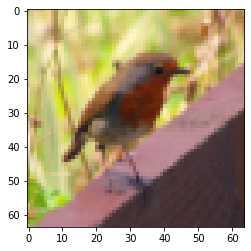

In [497]:
# Example of a picture
index =10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [498]:
train_set_x_orig.shape

(209, 64, 64, 3)

In [499]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
m_train,m_test,num_px

(209, 50, 64)

In [500]:
train_set_flattened = train_set_x_orig.reshape(train_set_x_orig.shape[1]*train_set_x_orig.shape[2]*3,train_set_x_orig.shape[0])

In [501]:
train_set_flattened.shape

(12288, 209)

In [502]:
test_set_flattened = test_set_x_orig.reshape(test_set_x_orig.shape[1]*test_set_x_orig.shape[2]*3,test_set_x_orig.shape[0])

In [503]:
test_set_flattened.shape

(12288, 50)

In [504]:
test_set_flattened = test_set_flattened/255
train_set_flattened = train_set_flattened/255

In [505]:
train_set_flattened

array([[0.06666667, 0.12156863, 0.21960784, ..., 0.26666667, 0.12941176,
        0.16078431],
       [0.27843137, 0.13333333, 0.17254902, ..., 0.18431373, 0.30196078,
        0.15686275],
       [0.19215686, 0.30980392, 0.15686275, ..., 0.14901961, 0.18039216,
        0.29411765],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [506]:
def sigmoid(z):
    sgm = 1/(1+np.exp(-z))
    return sgm

In [507]:
sigmoid(np.array([0,2]))

array([0.5       , 0.88079708])

In [508]:
def initialization(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [509]:
dim = 2
w,b = initialization(dim)

In [510]:
w,b

(array([[0.],
        [0.]]),
 0)

In [511]:
def propagation(w,b,X,Y):
        A = sigmoid(np.dot(w.T,X) + b)
        m = X.shape[1]
        dw = (1/m)*np.dot(X,(A-Y).T)
        db = (1/m)*np.sum(A-Y)
        cost = (-1/m)*(np.sum((Y*np.log(A)) + (1-Y)*(np.log(1-A))))
        # grads = {"dw": dw,"db": db}
        assert(dw.shape == w.shape)
        assert(db.dtype == float)
        cost = np.squeeze(cost)
        assert(cost.shape == ())
        return cost,dw,db

In [512]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
cost,dw,db = propagation(w, b, X, Y)
print ("dw = ",dw)
print ("db = ",db)
print ("cost = ",str(cost))

dw =  [[0.99845601]
 [2.39507239]]
db =  0.001455578136784208
cost =  5.801545319394553


In [513]:
w.shape,X.shape,Y.shape

((2, 1), (2, 3), (1, 3))

In [514]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        cost,dw,db = propagation(w, b, X, Y)
        ### END CODE HERE ###
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    
    return w,b, costs,dw,db

In [515]:
w,b, costs,dw,db = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print("W: ",w)
print("B: ",b)
print("Cost",costs)
print("dw",dw)
print("db",db)

W:  [[0.19033591]
 [0.12259159]]
B:  1.9253598300845747
Cost [5.801545319394553]
dw [[0.67752042]
 [1.41625495]]
db 0.21919450454067657


In [516]:
def predict(w, b, X):
    '''
    Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    
    Returns:
    Y_prediction -- a numpy array (vector) containing all predictions (0/1) for the examples in X
    '''
    Y_head = sigmoid(np.dot(w.T,X) + b)
    Y_head[Y_head>0.5] = 1
    Y_head[Y_head<0.5] = 0
    return Y_head

In [517]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
predict(w,b,X)

array([[1., 1., 0.]])

In [518]:
def initialization(dim):
    w = np.zeros((dim,1))
    b = 0
    return w,b

In [519]:
def propagation(w,b,X,Y):
        A = sigmoid(np.dot(w.T,X) + b)
        m = X.shape[1]
        dw = (1/m)*np.dot(X,(A-Y).T)
        db = (1/m)*np.sum(A-Y)
        cost = (-1/m)*(np.sum((Y*np.log(A)) + (1-Y)*(np.log(1-A))))
        # grads = {"dw": dw,"db": db}
        assert(dw.shape == w.shape)
        assert(db.dtype == float)
        cost = np.squeeze(cost)
        assert(cost.shape == ())
        return cost,dw,db

In [520]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    """
    This function optimizes w and b by running a gradient descent algorithm
    
    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat), of shape (1, number of examples)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- True to print the loss every 100 steps
    
    Returns:
    params -- dictionary containing the weights w and bias b
    grads -- dictionary containing the gradients of the weights and bias with respect to the cost function
    costs -- list of all the costs computed during the optimization, this will be used to plot the learning curve.
    
    Tips:
    You basically need to write down two steps and iterate through them:
        1) Calculate the cost and the gradient for the current parameters. Use propagate().
        2) Update the parameters using gradient descent rule for w and b.
    """
    
    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        ### START CODE HERE ### 
        cost,dw,db = propagation(w, b, X, Y)
        ### END CODE HERE ###
        
        # update rule (≈ 2 lines of code)
        ### START CODE HERE ###
        w = w - (learning_rate*dw)
        b = b - (learning_rate*db)
        ### END CODE HERE ###
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    
    return w,b, costs,dw,db

In [521]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):

    X_train = X_train.reshape(X_train.shape[1]*X_train.shape[2]*X_train.shape[3],X_train.shape[0])
    X_test = X_test.reshape(X_test.shape[1]*X_test.shape[2]*X_test.shape[3],X_test.shape[0])
    X_train = X_train/255.
    X_test = X_test/255.
    
    w,b =  initialization(X_train.shape[0])
    A = sigmoid(np.dot(w.T,X_train) + b)
    w,b, costs,dw,db = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost = False)

    Y_prediction_train = predict(w,b,X_train)
    Y_prediction_test = predict(w,b,X_test)

    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

In [528]:
d = model(train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, num_iterations = 4000, learning_rate = 0.01, print_cost = True)

train accuracy: 98.08612440191388 %
test accuracy: 34.0 %


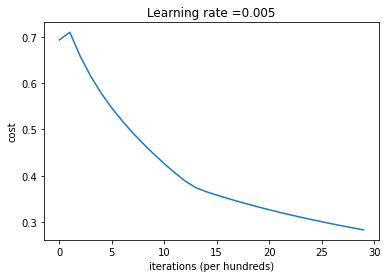

In [526]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 98.08612440191388 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 78.94736842105263 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 67.94258373205741 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.005
train accuracy: 97.12918660287082 %
test accuracy: 34.0 %

-------------------------------------------------------



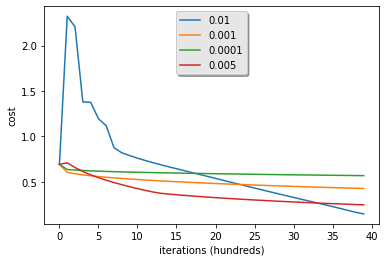

In [527]:
learning_rates = [0.01, 0.001, 0.0001,0.005]
models = {}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)] = model(train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, num_iterations = 4000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()